In [93]:
import scipy as sp
from scipy import integrate
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
r  = robjects.r
cf = robjects.FloatVector

In [3]:
libPaths=r[".libPaths"]

In [4]:
libPaths(robjects.StrVector([libPaths()[0], libPaths()[1], "D:/Documents/R/win-library/3.3"]))

R object with classes: ('character',) mapped to:
<StrVector - Python:0x0000023C5608DAC8 / R:0x0000023C5567F378>
['C:/Program Fi..., 'C:/Program Fi..., 'D:/Documents/...]

In [5]:
importr("stabledist")

rpy2.robjects.packages.Package as a <module 'stabledist'>

In [22]:
levy     = r["dstable"]
quantile = r["qstable"]

In [61]:
def PlotLevy(alphas, gammas, res=100, rng=[0.05, 0.95]):
    if type(alphas)==float or type(alphas)==int:
        alphas = [alphas]
    if type(gammas)==float or type(gammas)==int:
        gammas = [gammas]
    for alpha in alphas:
        for gamma in gammas:
            x = np.linspace( quantile(rng[0], alpha=alpha, gamma=gamma, beta=0)[0],
                             quantile(rng[1], alpha=alpha, gamma=gamma, beta=0)[0], res)
            y = np.array(levy(cf(x), alpha=alpha, gamma=gamma, beta=0))
            plt.figure(0, (14,7))
            plt.xlabel("x", fontsize=18)
            plt.ylabel("P(x)", fontsize=18)
            plt.plot(x,y, label=r"$\alpha=%.2f\;\; R=%.2f$"%(alpha, gamma))
    plt.legend(fontsize=18)

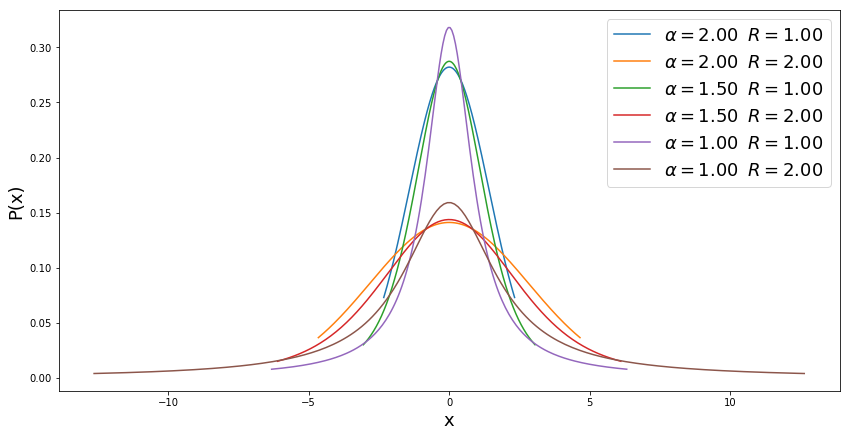

In [76]:
PlotLevy([2, 1.5, 1], [1,2], res=200)

\begin{equation}
\mathcal{L}(\boldsymbol{r}, \alpha, R) = \frac{1}{(2\pi)^3}\int d^3 \boldsymbol {q} e^{i\boldsymbol {q}\boldsymbol {r}}e^{-\frac{1}{2}|\boldsymbol {q}R|^\alpha}
\end{equation}

In [89]:
def mcmc(num_samples, f, fpars, pi, ppars, proposal_sigma=1.0):
    xi = np.random.uniform()
    s  = f(xi, fpars)-f(xi, fpars)
    for i in range(num_samples):
        xg = np.random.normal(xi, proposal_sigma)
        if np.random.uniform()<pi(xg, *ppars)/pi(xi, *ppars):
            xi = xg
        s += f(xi, fpars)
    return s/float(num_samples)

In [111]:
def f(x, r):
    return np.exp(1j*np.dot(x,r))

def p(x, alpha, R):
    return np.exp(-0.5*np.power(np.linalg.norm(x)*R, alpha))

def Levy_MCMC(r, alpha, R, num_samples):
    C = integrate.quad(p, -np.inf, np.inf, args=(alpha, R))[0]
    return C*mcmc(num_samples, f, r, p, (alpha, R))

In [112]:
Levy_MCMC(1, 2, 1, 10000)

(1.486944926726302+0.0038897885661507807j)

In [113]:
levy(1, alpha=2, gamma=1, beta=0)[0]

0.21969564473386122